In [18]:
import pandas as pd
from prophet import Prophet

In [21]:
#upload to files 'user2_data.csv' and copy the path
data = pd.read_csv('/content/user2_data.csv')

# Convert timestamp to datetime object
data['ttime'] = pd.to_datetime(data['ttime'])

# Extract month from timestamp
data['month'] = data['ttime'].dt.month

# Rename columns for Prophet
data = data[['ttime', 'sm','pm1','pm2','pm3','am','lum','temp','humd','pres','st']].rename(columns={'ttime': 'ds', 'sm': 'y'})



# Training a Prophet model
model = Prophet()
model_f=model.fit(data)

# Create a DataFrame for next month
next_month = pd.DataFrame({
    'ds': pd.date_range(start='2023-03-01', end='2023-03-31', freq='D')  # Timestamp for each day of March
})

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy39kmt28/hvlw5b1a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy39kmt28/dg82_ont.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17973', 'data', 'file=/tmp/tmpy39kmt28/hvlw5b1a.json', 'init=/tmp/tmpy39kmt28/dg82_ont.json', 'output', 'file=/tmp/tmpy39kmt28/prophet_model1g8u34c4/prophet_model-20230325182916.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:29:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:29:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


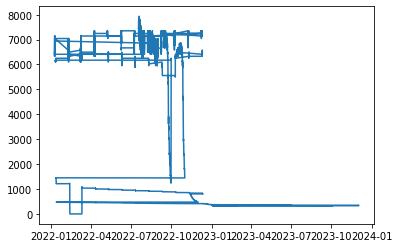

In [22]:
#plotting soil moisture against date 
import matplotlib.pyplot as plt

plt.plot(data['ds'],data['y'],color='#1f77b4')



In [23]:
# Making predictions for next month
predictions = model.predict(next_month)

# Printing predicted soil moisture values for next month
print(predictions[['ds', 'yhat']])


           ds        yhat
0  2023-03-01  549.080162
1  2023-03-02  805.409675
2  2023-03-03  829.198826
3  2023-03-04  651.701952
4  2023-03-05  675.820110
5  2023-03-06  301.034861
6  2023-03-07  391.976447
7  2023-03-08  527.364827
8  2023-03-09  783.694339
9  2023-03-10  807.483490
10 2023-03-11  629.986616
11 2023-03-12  654.104774
12 2023-03-13  279.319525
13 2023-03-14  370.261111
14 2023-03-15  505.649491
15 2023-03-16  761.979003
16 2023-03-17  785.768154
17 2023-03-18  608.271280
18 2023-03-19  632.389438
19 2023-03-20  257.604190
20 2023-03-21  348.545775
21 2023-03-22  483.934155
22 2023-03-23  740.263668
23 2023-03-24  764.052818
24 2023-03-25  586.555944
25 2023-03-26  610.674102
26 2023-03-27  235.888854
27 2023-03-28  326.830440
28 2023-03-29  462.218819
29 2023-03-30  718.548332
30 2023-03-31  742.337482


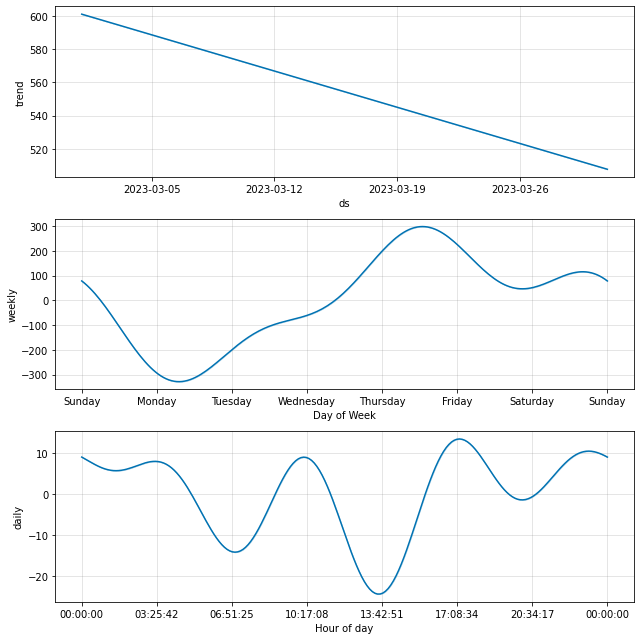

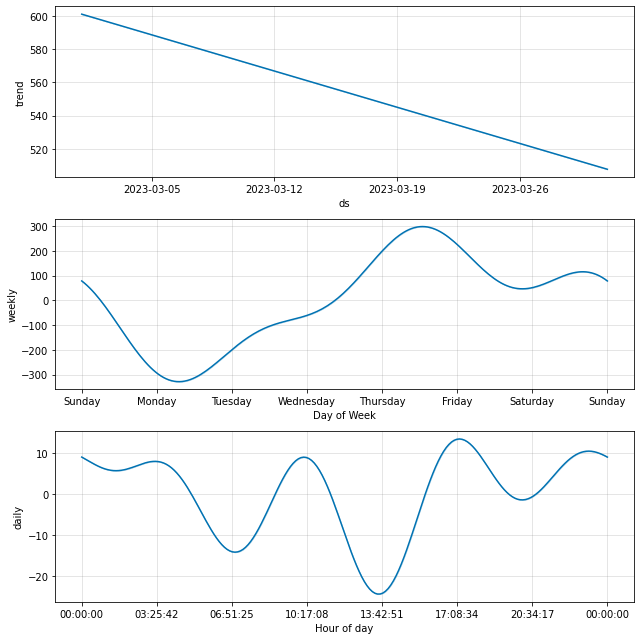

In [24]:
model.plot_components(predictions)

In [26]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, predictions)
plot_components_plotly(model, predictions)
